In [1]:
! pip install install astpretty

  Running setup.py bdist_wheel for install ... done
  Stored in directory: /home/stefan/.cache/pip/wheels/41/70/48/0c5542b7de04d4490d910cdf760f29e1ee0beb8a6e1d3bf1f2
Successfully built install


In [56]:
! pip install graphviz
! pip install networkx

     |████████████████████████████████| 1.6 MB 534 kB/s eta 0:00:01


In [28]:
from staticfg import CFGBuilder
import astpretty

In [35]:
import graphviz
from graphviz import Digraph

In [17]:
src = """
print("hello world")
"""

In [181]:
src2 = """
# a comment

cont111 = ContainerResource()
cont2 = ContainerResource()

incubator = DeviceResource()

start1 = cont1.set_start_position()
start2 = cont2.set_start_position()
"""

In [176]:
cfg = CFGBuilder().build_from_src('hello.py', src)

TypeError: compile() arg 1 must be a string, bytes or AST object

In [7]:
cfg.build_visual('helloCFG', 'svg')

In [9]:
cfg = CFGBuilder().build_from_file('incubate.py', './demo_incubation_process.py')

In [10]:
cfg.build_visual('helloCFG', 'svg')

In [182]:
import ast

In [183]:
node = ast.parse(src2, mode='exec')

SyntaxError: invalid syntax (<unknown>, line 7)

In [179]:
print(ast.dump(node))

Module(body=[Assign(targets=[Name(id='cont111', ctx=Store())], value=Call(func=Name(id='ContainerResource', ctx=Load()), args=[], keywords=[]), type_comment=None), Assign(targets=[Name(id='cont2', ctx=Store())], value=Call(func=Name(id='ContainerResource', ctx=Load()), args=[], keywords=[]), type_comment=None), Assign(targets=[Name(id='incubator', ctx=Store())], value=Call(func=Name(id='DeviceResource', ctx=Load()), args=[], keywords=[]), type_comment=None), Assign(targets=[Name(id='start1', ctx=Store())], value=Call(func=Attribute(value=Name(id='cont1', ctx=Load()), attr='set_start_position', ctx=Load()), args=[], keywords=[]), type_comment=None), Assign(targets=[Name(id='start2', ctx=Store())], value=Call(func=Attribute(value=Name(id='cont2', ctx=Load()), attr='set_start_position', ctx=Load()), args=[], keywords=[]), type_comment=None)], type_ignores=[])


In [180]:
astpretty.pprint(node)

Module(
    body=[
        Assign(
            lineno=4,
            col_offset=0,
            end_lineno=4,
            end_col_offset=29,
            targets=[Name(lineno=4, col_offset=0, end_lineno=4, end_col_offset=7, id='cont111', ctx=Store())],
            value=Call(
                lineno=4,
                col_offset=10,
                end_lineno=4,
                end_col_offset=29,
                func=Name(lineno=4, col_offset=10, end_lineno=4, end_col_offset=27, id='ContainerResource', ctx=Load()),
                args=[],
                keywords=[],
            ),
            type_comment=None,
        ),
        Assign(
            lineno=5,
            col_offset=0,
            end_lineno=5,
            end_col_offset=27,
            targets=[Name(lineno=5, col_offset=0, end_lineno=5, end_col_offset=5, id='cont2', ctx=Store())],
            value=Call(
                lineno=5,
                col_offset=8,
                end_lineno=5,
                end_col_offset=

In [174]:
d = graphviz.Digraph()

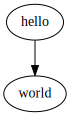

In [33]:
d.edge('hello', 'world')
d

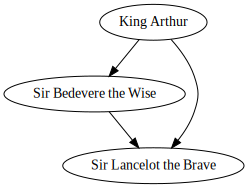

In [53]:
dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')

dot.node('B', 'Sir Bedevere the Wise')

dot.node('L', 'Sir Lancelot the Brave')

#dot.edge('AB-e','AB')
#dot.edge('AL-e','AL')

dot.edges(['AB', 'AL'])

dot.edge('B', 'L') # , constraint='false'
dot

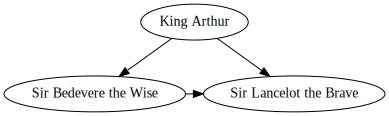

In [54]:
dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')

dot.node('B', 'Sir Bedevere the Wise')

dot.node('L', 'Sir Lancelot the Brave')

#dot.edge('AB-e','AB')
#dot.edge('AL-e','AL')

dot.edges(['AB', 'AL'])

dot.edge('B', 'L', constraint='false') 
dot

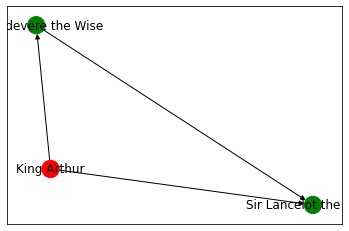

In [166]:
import networkx as nx
G = nx.DiGraph(comment='The Round Table')
G.add_node('A', label='King Arthur', node_color="red")
G.add_node('B', label='Sir Bedevere the Wise', node_color="green")
G.add_node('L', label='Sir Lancelot the Brave', node_color="green")
G.add_edge('A','B')
G.add_edge('A','L')
G.add_edge('B','L')
lab_dict = nx.get_node_attributes(G, 'label') 
col_map = [col[1] for col in G.nodes.data('node_color')]
#lab_dict = dict([lab for lab in G.nodes.data('label')])
lab_dict

nx.draw_networkx(G, labels=lab_dict, node_color=col_map, with_labels=True)

In [167]:
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

# set defaults
#G.graph['graph']={'rankdir':'TD'}
#G.graph['node']={'shape':'circle'}
#G.graph['edges']={'arrowsize':'4.0'}

A = to_agraph(G)
print(A)
#A.layout('dot')
#A
#A_dot = A.draw()

strict digraph "" {
	graph [comment="The Round Table"];
	node [label="\N"];
	A	 [label="King Arthur",
		node_color=red];
	B	 [label="Sir Bedevere the Wise",
		node_color=green];
	A -> B;
	L	 [label="Sir Lancelot the Brave",
		node_color=green];
	A -> L;
	B -> L;
}



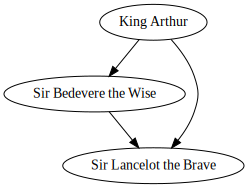

In [168]:
from graphviz import Source
Source(A)
#src.render('test-output/holy-grenade.gv', view=True)
